# **REGRESSÃO LINEAR**

O algoritmo de regressão tenta encontrar uma reta que descreve a trajetória dos registros, ou seja, se tivermos registros no plano xy, o algoritmo tenta traçar uma reta que passe por todos eles, mas nunca vai conseguir, dai ele traça uma reta que representa essa distribuição, e que tenha o menor erro possível. O erro é dado pela distância entre o ponto e a reta.

![](https://cdn-images-1.medium.com/max/1600/1*eeIvlwkMNG1wSmj3FR6M2g.gif)

Fonte: https://towardsdatascience.com/linear-regression-the-easier-way-6f941aa471ea

- Regressão linear simples:
    - Apenas 1 atributo.
    - Equação: $ y=b_0+b_1.x $

- Regressão linear múltipla:
    - Mais de 1 atributo.
    - Equação: $y=b_0+b_1.x_1+b_2.x_2+b_3.x_3+...+b_n.x_n$
    
- Correlação: Se `x` e `y` tiverem uma correlação forte, quer dizer que `x` influencia `y`. Isso pode ocorrer de forma diretamente proporcional (positiva) ou inversamente proporcional (negativa). Se a correlação for forte é bem provável que o modelo de regressão linear adapte-se bem aos dados.

|Correlação (r)|Força|
|-|-|
|1|Forte|
|0|Inexistente|
|-1|Forte|

---
- Links para aprender mais:
    - [Introdução a Regressão Linear - IAexpert](https://iaexpert.com.br/index.php/2018/11/30/introducao-a-regressao-linear/).
    - [Simple Linear Regression - Cognitive Class](https://www.youtube.com/watch?v=zWcSM59wbHc&feature=youtu.be)
    - [Multiple Linear Regression - Cognitive Class](https://www.youtube.com/watch?v=-frTbwhs0Y0&feature=youtu.be)
    - [Linear Regression: The Easier Way - SAGAR SHARMA](https://towardsdatascience.com/linear-regression-the-easier-way-6f941aa471ea)
    - [Regressão Linear e o Mínimo Quadrado - Khan Academy em Português](https://www.youtube.com/watch?v=sIzQ0my3bRA)
    - [Calculando o coeficiente de correlação r - Khan Academy em Português](https://www.youtube.com/watch?v=m1bqsFYVxwM)
---

# **IMPLEMENTAÇÃO**
Para a implementação do algoritmo foi utilizada a biblioteca Sklearn, veja a [Documentação](https://scikit-learn.org/stable/modules/classes.html#)   

## REGRESSÃO SIMPLES
### **Base de dados**
A base de dados que será utilizada será a Boston housing price que já pode ser encontrada na base de dados do keras. Porém essa base de dados possui 13 atributos, logo irei precisar eliminar 12 deles para fazer a regressão simples.

> Como irei pegar a primeira coluna como único atributo, é provável que os resultados não sejam muito bons, afinal estou perdendo muitos dados e também podem ser dados que não possuem uma boa correlação com a saída, porém tudo isso aqui é apenas para mostrar como se implementa uma regressão linear.

### **Escalonando os dados**
Por se tratar de um problema de regressão é necessário efetuar o escalonamento dos dados, para isso será utilizada a biblioteca sklearn. É conveniente que o escalonamento seja feito antes de dividir a base de dados em treinamento e teste.

In [1]:
from keras.datasets import boston_housing
(x, y),(_,_) = boston_housing.load_data(test_split=0) # não carrego os dados de teste

Using TensorFlow backend.


57344/57026 [==============================] - 0s 0us/step


In [2]:
x.shape

(506, 13)

In [3]:
y.shape

(506,)

É necessário transformar o formato de y, pois para efetuar o escalonamento é necessário que ele possua o formato de (x,y).

In [4]:
y = y.reshape(506,1)
y.shape

(506, 1)

### **Escalonando os dados**

In [5]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

In [6]:
x.shape

(506, 13)

In [7]:
y.shape

(506, 1)

### **Dividindo a base de dados em treinamento e teste**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x[:,0:1],y, test_size = 0.3, random_state = 0) # 30% de test

In [9]:
x_train.shape

(354, 1)

### **Criando e treinando o regressor**

In [10]:
#------------------------------Criando o regressor----------------------------#
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Exibindo os valores dos coeficientes da equação da reta.

In [11]:
#--------------------------Visualizando os coeficientes-----------------------#
print('b0 = {}'.format(regressor.intercept_))
print('b1 = {}'.format(regressor.coef_))

b0 = [-0.0163901]
b1 = [[-0.48076986]]


Através da biblioteca matplotlib pode-se visualizar a reta de regressão juntamente com os pontos reais. 
> Como todos os dados estão na mesma base de escalonamento, não irei reverter a base, pois não fará diferença no desenho do gráfico.

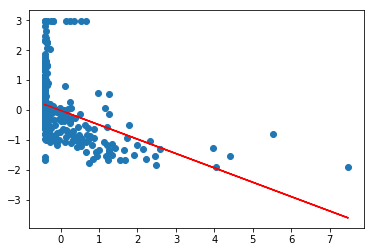

In [12]:
#---Comando exclusivo para o jupyter. Faz a plotagem do matplotlib ser exibida
%matplotlib inline  
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, label = 'Valores Reais')
plt.plot(x_train, regressor.predict(x_train), color = 'red', label = 'Reta de Regressão')

Pode-se prever um valor e verificar.

In [13]:
#------------------------------Prevendo um valor------------------------------#
previsoes = regressor.predict(x_test)

Pode-se verificar a correlação do modelo, que basicamente vai nos dizer a sua precisão.

> OBS.: Esse valor é com relação a base de dados de treinamento, logo ele pode dar grande, mas se o fizermos com relação à base de teste ele pode dar pequeno, o que caracteriza overfitting.

In [14]:
#----Ver a correlação do modelo com relação a base de dados de Treinamento----#
score = regressor.score(x_train, y_train)
print('A correlação do modelo com a base de dados de treinamento é de: {}'.format(score))

#-------Ver a correlação do modelo com relação a base de dados de teste-------#
score = regressor.score(x_test, y_test)
print('A correlação do modelo com a base de dados de teste é de: {}'.format(score))

A correlação do modelo com a base de dados de treinamento é de: 0.16392077356972568
A correlação do modelo com a base de dados de teste é de: 0.07693708872895111


Outra possibilidade é verificar a distância entre os pontos e a reta de regressão. 

A biblioteca yellowbrick coloca a reta no eixo x e espaça os pontos em y indicando suas distâncias com relação a reta.

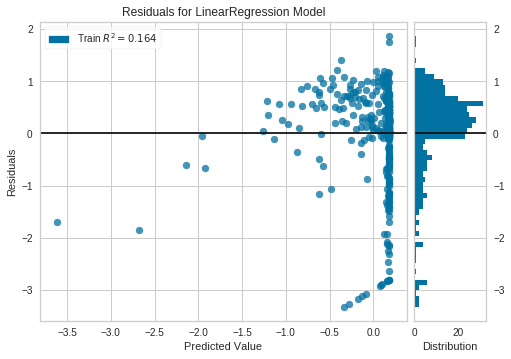

In [15]:
#-----------------------Verificar os desvios (erros)---------------------------#
# Mostra a distancia entre cada ponto e a reta, sendo que a reta está no 0     #
#------------------------------------------------------------------------------#
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor)
visualizador.fit(x_train,y_train)
visualizador.poof()

> OBS.: Veja na parte superior à direita do gráfico que temos o valor Train $R^2$ = 0.164, esse valor é igual a correlação do modelo.

E por fim pode-se medir os erros absoluto e quadrático médio.

In [16]:
#------------------Diferança entre valores reais e previstos------------------#
from sklearn.metrics import mean_absolute_error, mean_squared_error
erro_absoluto = mean_absolute_error(y_test, previsoes)
erro_quadratico = mean_squared_error(y_test, previsoes)
print('Erro absoluto: {}'.format(erro_absoluto))
print('Erro quadratico: {}'.format(erro_quadratico))

Erro absoluto: 0.6268465400185806
Erro quadratico: 0.7834711013236023


## REGRESSÃO LINEAR MÚLTIPLA
A implementação da regressão múltipla é idêntica a implementação da simples, a diferença está apenas na quantidade de atributos que irão para o x.

### **Base de dados**
A base de dados que será utilizada será a Boston housing price que já pode ser encontrada na base de dados do keras.

In [17]:
from keras.datasets import boston_housing
(x, y),(_,_) = boston_housing.load_data(test_split=0) # não carrego os dados de teste

In [18]:
x.shape

(506, 13)

In [19]:
y.shape

(506,)

É necessário transformar o formato de y, pois para efetuar o escalonamento é necessário que ele possua o formato de (x,y).

In [20]:
y = y.reshape(506,1)
y.shape

(506, 1)

### **Escalonando os dados**

In [21]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

In [22]:
x.shape

(506, 13)

In [23]:
y.shape

(506, 1)

### **Dividindo a dase de dados em treinamento e teste**

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0) # 30% de test

In [25]:
x_train.shape

(354, 13)

### **Criando e treinando o regressor**

In [26]:
#------------------------------Criando o regressor----------------------------#
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

#----Ver a correlação do modelo com relação a base de dados de Treinamento----#
score = regressor.score(x_train, y_train)
print('A correlação do modelo com a base de dados de treinamento é de: {}'.format(score))

#-------Ver a correlação do modelo com relação a base de dados de teste-------#
score = regressor.score(x_test, y_test)
print('A correlação do modelo com a base de dados de teste é de: {}'.format(score))

#------------------------------Prevendo um valor------------------------------#
previsoes = regressor.predict(x_test)

#------------------Diferança entre valores reais e previstos------------------#
erro_absoluto = mean_absolute_error(y_test, previsoes)
erro_quadratico = mean_squared_error(y_test, previsoes)
print('Erro absoluto: {}'.format(erro_absoluto))
print('Erro quadratico: {}'.format(erro_quadratico))

A correlação do modelo com a base de dados de treinamento é de: 0.7385354802462833
A correlação do modelo com a base de dados de teste é de: 0.7352897705452341
Erro absoluto: 0.3581491001298181
Erro quadratico: 0.22467896009056512
